**Goal**: Implement Q-learning and use it to solve Gymansium CartPole-v1

### Import

In [1]:
import os
import pickle

import gymnasium as gym
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

### Q learning

In [2]:
# Specify the environment
env = gym.make("CartPole-v1")

In [3]:
# Set hyperparameters
alpha_0 = 0.1  # Learning rate
epsilon_0 = 0.1  # Exploration rate
gamma = 0.99  # Discount factor
num_batch = 10
num_train_episodes = 10000  # Number of training episodes
num_state_bins = 14  # Number of state bins

In [4]:
# Descritise states
def discretize_state(state, state_bin):
    return tuple(
        [
            np.digitize(state[i], state_bin[i]) - 1
            for i in range(env.observation_space.shape[0])
        ]
    )

In [5]:
# e-greedy action selection
def egreedy(Q, state, epsilon):
    if epsilon < np.random.uniform():
        return np.argmax(Q[state])
    else:
        return np.random.randint(env.action_space.n)

In [6]:
# Define state bins. Hand crafted because some observation goes from -inf to inf. 
# Make no sense to divide such observation spaces evenly.
# Also, Cartpole env has a bug where observation can be outside the pre-set observation range.
state_bins = [
    np.insert(
        np.linspace(-4.8, 4.8, num_state_bins - 1),
        [0, num_state_bins - 1],
        [-np.inf, np.inf],
    ),
    np.insert(
        np.linspace(-0.48, 0.48, num_state_bins - 1),
        [0, num_state_bins - 1],
        [-np.inf, np.inf],
    ),
    np.insert(
        np.linspace(-0.42, 0.42, num_state_bins - 1),
        [0, num_state_bins - 1],
        [-np.inf, np.inf],
    ),
    np.insert(
        np.linspace(-0.42, 0.42, num_state_bins - 1),
        [0, num_state_bins - 1],
        [-np.inf, np.inf],
    ),
]

In [7]:
# Initialise the Q table
Q = np.random.uniform(
    low=0,
    high=1,
    size=([num_state_bins] * env.observation_space.shape[0] + [env.action_space.n]),
)

In [8]:
# Training loop
for batch in range(num_batch):
    total_rewards = []
    alpha = alpha_0
    epsilon = epsilon_0
    for episode in tqdm(range(num_train_episodes)):
        state, _ = env.reset()
        score = 0
        state = discretize_state(state, state_bins)

        while True:
            # Perform the chosen action and observe the next state and reward
            action = egreedy(Q, state, epsilon)

            next_state, reward, terminated, truncated, info = env.step(action)
            next_state = discretize_state(next_state, state_bins)

            # Update the Q-value for the current state-action pair
            Q[state][action] = Q[state][action] + alpha * (
                reward + gamma * np.max(Q[next_state]) - Q[state][action]
            )

            state = next_state
            score += reward

            if terminated or truncated:
                total_rewards.append(score)
                break

    total_rewards = np.array(total_rewards)
    print(f"--------------------- Batch {batch+1} ---------------------")
    print(
        f"The mean reward is {np.mean(total_rewards)} and the standard deviation is {np.std(total_rewards)}."
    )

100%|██████████| 10000/10000 [00:10<00:00, 910.83it/s]


--------------------- Batch 1 ---------------------
The mean reward is 57.1031 and the standard deviation is 76.74098299077228.


100%|██████████| 10000/10000 [00:36<00:00, 274.22it/s]


--------------------- Batch 2 ---------------------
The mean reward is 188.76 and the standard deviation is 156.0130872715491.


100%|██████████| 10000/10000 [00:46<00:00, 214.59it/s]


--------------------- Batch 3 ---------------------
The mean reward is 239.3936 and the standard deviation is 161.41097261041458.


100%|██████████| 10000/10000 [00:47<00:00, 210.09it/s]


--------------------- Batch 4 ---------------------
The mean reward is 249.866 and the standard deviation is 152.8032795590461.


100%|██████████| 10000/10000 [00:51<00:00, 192.99it/s]


--------------------- Batch 5 ---------------------
The mean reward is 273.4149 and the standard deviation is 150.25194427357673.


100%|██████████| 10000/10000 [00:57<00:00, 172.56it/s]


--------------------- Batch 6 ---------------------
The mean reward is 298.4262 and the standard deviation is 148.11402551264348.


100%|██████████| 10000/10000 [01:02<00:00, 159.90it/s]


--------------------- Batch 7 ---------------------
The mean reward is 315.7339 and the standard deviation is 151.9902973573971.


100%|██████████| 10000/10000 [01:02<00:00, 159.94it/s]


--------------------- Batch 8 ---------------------
The mean reward is 325.3716 and the standard deviation is 151.90686262786156.


100%|██████████| 10000/10000 [01:00<00:00, 166.64it/s]


--------------------- Batch 9 ---------------------
The mean reward is 310.6718 and the standard deviation is 150.476813113383.


100%|██████████| 10000/10000 [01:04<00:00, 155.33it/s]

--------------------- Batch 10 ---------------------
The mean reward is 330.0581 and the standard deviation is 150.67536867182372.


In [9]:
# Save the Q table
save_path = os.path.join("Training", "Saved Models", "CartPole_Q_table.pkl")
with open(save_path, "wb") as f:
    pickle.dump(Q, f)

### Test - trained model - Q-learning

In [10]:
# Load the Q table
save_path = os.path.join("Training", "Saved Models", "CartPole_Q_table.pkl")
with open(save_path, "rb") as f:
    Q = pickle.load(f)

In [15]:
# Test model (visually)
env = gym.make("CartPole-v1", render_mode = "human")
episodes = 1
for episode in range(episodes):
    state, _ = env.reset()
    score = 0

    while True:
        env.render()
        state = discretize_state(state, state_bins)
        action = np.argmax(Q[state])
        state, reward, terminated, truncated, info = env.step(action)
        score += reward
        if terminated or truncated:
            print(f"Score: {score}")
            break

100%|██████████| 1/1 [00:20<00:00, 20.99s/it]

Score: 500.0


In [11]:
# Test model
env = gym.make("CartPole-v1")
total_rewards = []
episodes = 1000
for episode in tqdm(range(episodes)):
    state, _ = env.reset()
    score = 0

    while True:
        state = discretize_state(state, state_bins)
        action = np.argmax(Q[state])
        state, reward, terminated, truncated, info = env.step(action)
        score += reward
        if terminated or truncated:
            total_rewards.append(score)
            break

total_rewards = np.array(total_rewards)
print(
    f"The mean reward is {np.mean(total_rewards)} and the standard deviation is {np.std(total_rewards)}."
)

100%|██████████| 1000/1000 [00:04<00:00, 242.32it/s]

The mean reward is 343.736 and the standard deviation is 139.96815460668185.


(array([ 28.,  55., 123., 115.,  91.,  93.,  59.,  27.,  22., 387.]),
 array([ 71. , 113.9, 156.8, 199.7, 242.6, 285.5, 328.4, 371.3, 414.2,
        457.1, 500. ]),
 <BarContainer object of 10 artists>)

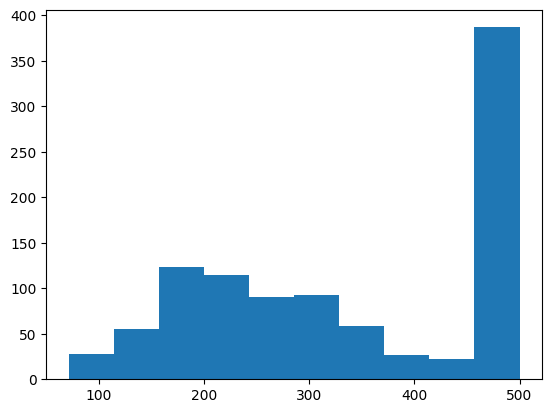

In [12]:
plt.hist(total_rewards)